In [5]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import Series
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression



In [4]:
print(10)

10


In [8]:
def generate():
    X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
    print(X)

generate()

[[-0.18531246]
 [-1.14968098]
 [ 0.09944756]
 [-1.33169607]
 [ 0.14890629]
 [ 1.45083528]
 [-0.40663145]
 [-0.51157039]
 [ 0.79705476]
 [-0.84264335]
 [-2.64967472]
 [-0.94075961]
 [ 0.11041502]
 [ 0.70216194]
 [-0.09854945]
 [ 1.58467193]
 [-1.49807802]
 [-1.96000085]
 [ 0.55193455]
 [ 0.66365928]
 [ 0.70268174]
 [ 0.74141295]
 [-1.47338485]
 [ 0.47561891]
 [ 1.13769587]
 [ 2.08547253]
 [ 1.47490621]
 [ 1.63976465]
 [ 1.16276977]
 [-0.53298835]
 [ 0.43907721]
 [ 1.9637736 ]
 [ 0.91226412]
 [-0.50621822]
 [-0.19175787]
 [-0.59391905]
 [ 0.40496994]
 [ 0.3721625 ]
 [ 1.23571015]
 [ 1.00232023]
 [-1.10592543]
 [ 3.06412767]
 [ 1.35726172]
 [-0.10541362]
 [-0.89993983]
 [ 0.76261825]
 [-0.2866206 ]
 [-1.14103368]
 [ 2.23927625]
 [ 0.64982241]
 [-1.15600799]
 [ 0.4918214 ]
 [ 0.02753372]
 [-0.1109209 ]
 [ 0.39264113]
 [-0.8798715 ]
 [ 0.39428512]
 [ 2.32171703]
 [ 0.41790929]
 [-1.38335771]
 [ 0.91973601]
 [ 0.32138279]
 [-0.49824627]
 [ 0.60747391]
 [-0.6362103 ]
 [ 0.34064773]
 [-0.32085

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([[5, 15, 25, 35, 45, 55], [5, 15, 25, 35, 45, 55], [5, 15, 25, 35, 45, 55]]).reshape((-1, 1))
y = np.array([[5, 15, 25, 35, 45, 55], [5, 15, 25, 35, 45, 55], [5, 15, 25, 35, 45, 55]]).reshape((-1, 1))

print(x.shape)
print(y.shape)

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

(1199,)
(1199, 1)
(1199,)
(1199, 1)
(1199,)
(1199, 1)


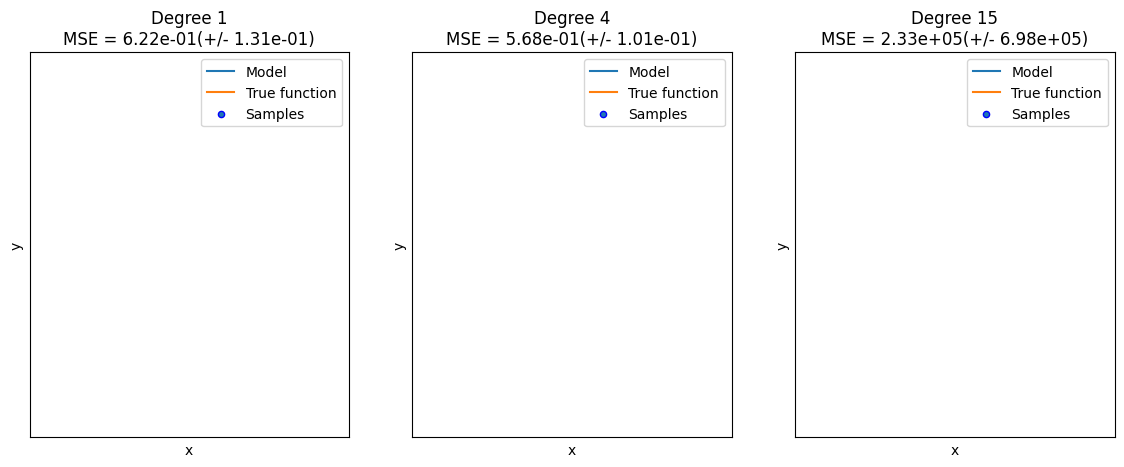

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split



df_training = pd.read_csv("winequality-red.csv", sep=";")
X = df_training["sulphates"].values
y = df_training["quality"].values

x_train, x_test, y_train, y_test = train_test_split(X, y)

degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    
    print(x_train.shape)
    tmp = x_train[:, np.newaxis]
    print(tmp.shape)
    pipeline.fit(tmp, y_train)

    scores = cross_val_score(
        pipeline, x_train[:, np.newaxis], y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, y_test, label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

(442, 10)
(442,)
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


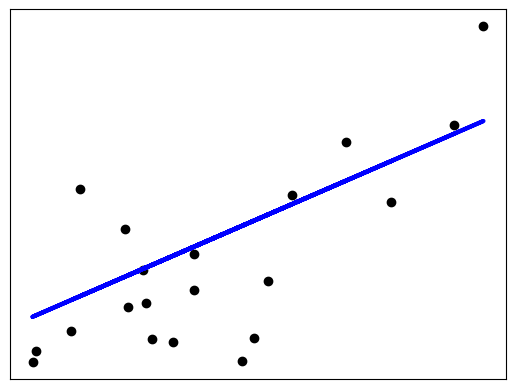

In [22]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_X.shape)
print(diabetes_y.shape)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

(30, 1)
(30,)
(30, 1)
(30,)
(30, 1)
(30,)


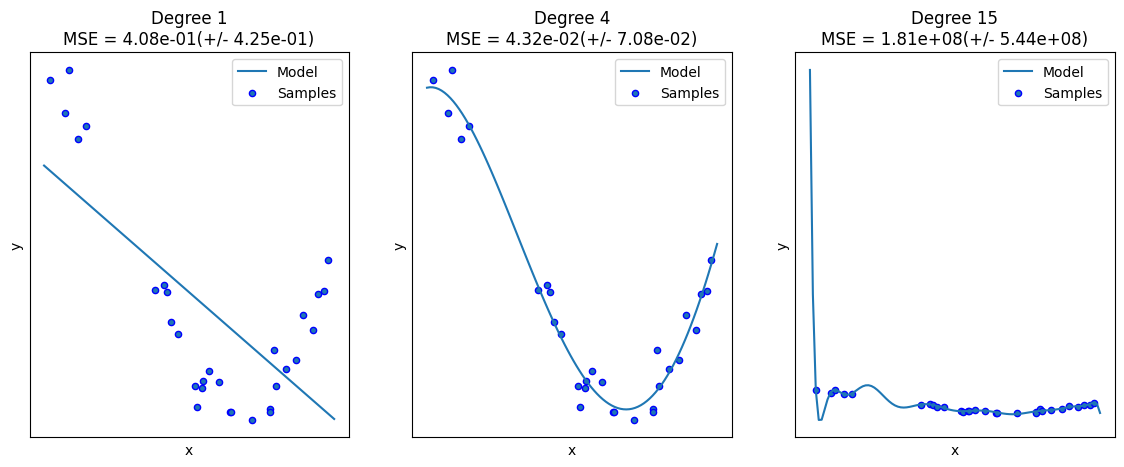

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    print(X[:, np.newaxis].shape)
    print(y.shape)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

R2 score: 0.9424898114335866


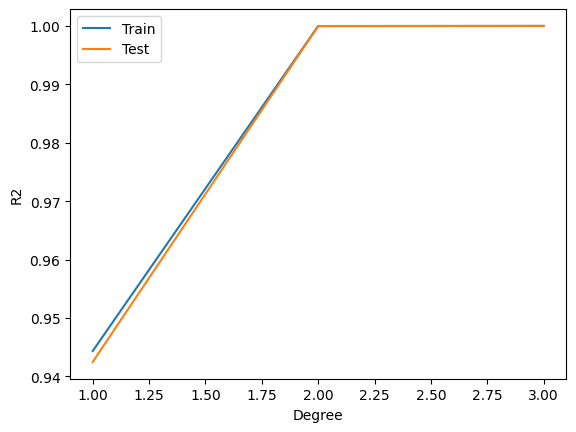

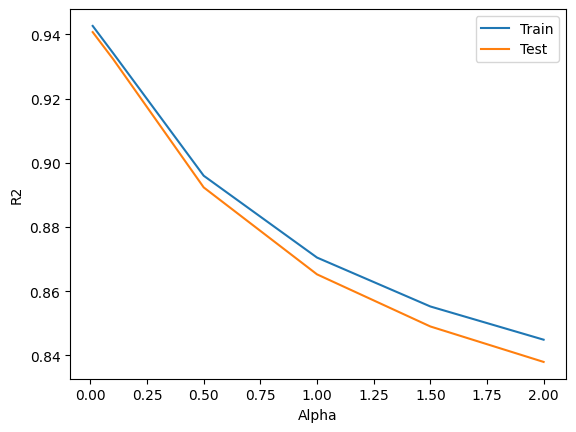

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

# Подгрузка данных
data_file = r'data.txt'

data_df = pd.read_csv(data_file, delim_whitespace=True)

X = data_df.iloc[:, :-1]
y = data_df.iloc[:, -1]

# Разделение на тренировку и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)

# Подсчёт r2
y_pred = lr.predict(X_test)
print(f"R2 score: {r2_score(y_test, y_pred)}")

# Полиномиальное распределение
degrees = range (1, 4)
train_errors, test_errors = [], []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly, y_train)
    train_errors.append(r2_score(y_train, lr_poly.predict(poly.transform(X_train))))
    test_errors.append(r2_score(y_test, lr_poly.predict(poly.transform(X_test))))

plt.plot(degrees, train_errors, label='Train')
plt.plot(degrees, test_errors, label='Test')
plt.xlabel('Degree')
plt.ylabel('R2')
plt.legend()
plt.show()

# Регуляризация
alphas = (0.01, 0.1, 0.5, 1, 1.5, 2)
train_errors, test_errors = [], []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_errors.append(r2_score(y_train, ridge.predict(X_train)))
    test_errors.append(r2_score(y_test, ridge.predict(X_test)))

plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.legend()
plt.show()